In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/home/aronzx/Desktop/data_PA1.csv')


,House_Type_Confidence,Side_Walk_Confidence
House_Type_Confidence,1.000000,0.936602
Side_Walk_Confidence,0.936602,1.000000


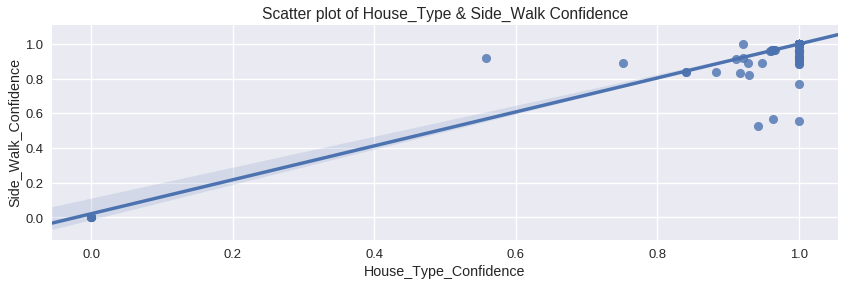

In [34]:
#Correlation between house_type Confidence and side_walk Confidence.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df=pd.read_csv('/home/aronzx/Desktop/data_PA1.csv')
dic={'House_Type_Confidence':df['house_types:confidence'],'Side_Walk_Confidence':df['sidewalk_ok:confidence']}
test_frame=pd.DataFrame(dic)
sns.set_context("talk")
sns.lmplot(x='House_Type_Confidence', y='Side_Walk_Confidence',data=test_frame,size=4, aspect=3)
plt.title('Scatter plot of House_Type & Side_Walk Confidence')
plt.xlabel('House_Type_Confidence')
plt.ylabel('Side_Walk_Confidence')
test_frame.corr(method='pearson', min_periods=1)

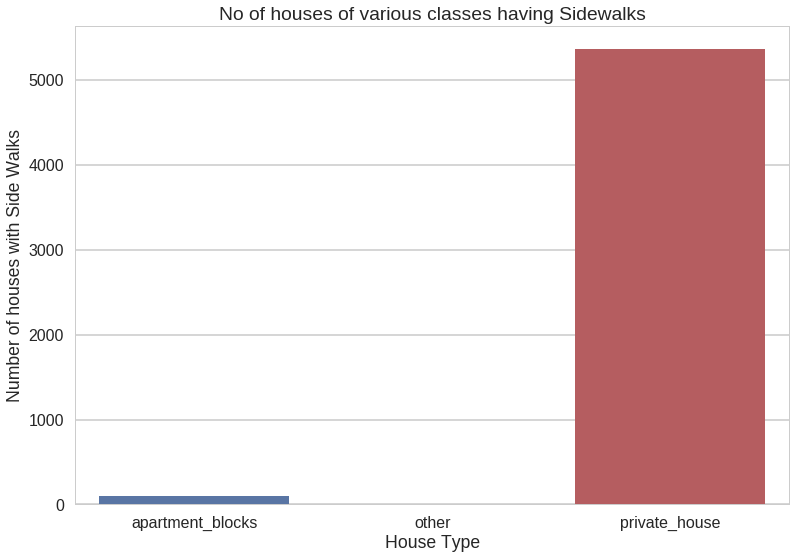

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import seaborn as sns
import math
df=pd.read_csv('/home/aronzx/Desktop/data_PA1.csv')
dic={'House_Type':df['house_types'],'Side_Walk':df['sidewalk_ok']}
test_frame=pd.DataFrame(dic)
mymap = {'yes':1, 'no':0,'Not sure, mixed':0}
test_frame=test_frame.dropna(axis=0, how='any')
test_frame = test_frame.reset_index(drop=True)
test_frame=test_frame.applymap(lambda s: mymap.get(s) if s in mymap else s)
test_frame['Side_Walk'] = test_frame['Side_Walk'].astype(int)
sums = test_frame.Side_Walk.groupby(test_frame.House_Type).sum()
sns.set_style("whitegrid")
sns.set_context("poster")
ax = sns.barplot(x=sums.index, y=sums, data=test_frame)
ax.set(xlabel='House Type', ylabel='Number of houses with Side Walks')
plt.title('No of houses of various classes having Sidewalks')

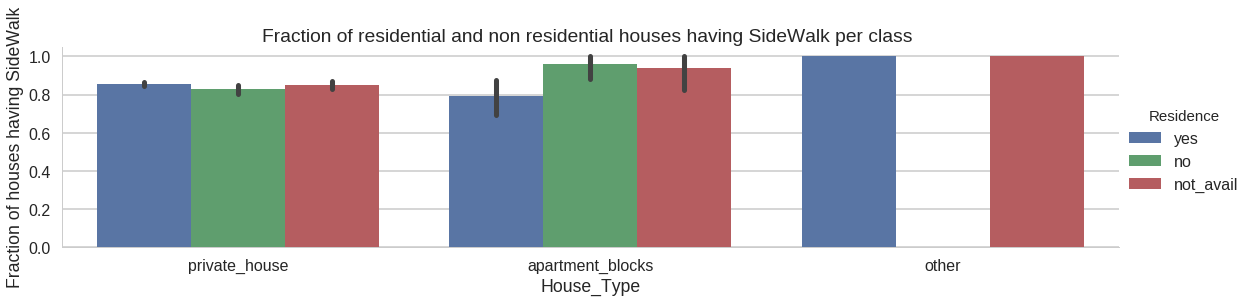

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
df=pd.read_csv('/home/aronzx/Desktop/data_PA1.csv')
dic={'House_Type':df['house_types'],'Side_Walk':df['sidewalk_ok']}
test_frame=pd.DataFrame(dic)
dic1={'Residence':df['residential_yes']}
test_frame
test_frame=test_frame.dropna(axis=0, how='any')
mymap = {'yes':1, 'no':0,'Not sure, mixed':0}
test_frame=test_frame.dropna(axis=0, how='any')
test_frame = test_frame.reset_index(drop=True)
test_frame=test_frame.applymap(lambda s: mymap.get(s) if s in mymap else s)
test_frame['Residence']=pd.DataFrame(dic1)
sns.set_context("poster")
sns.factorplot(x="House_Type", y="Side_Walk", hue="Residence", data=test_frame, kind="bar",size=4, aspect=4)
plt.xlabel('House_Type')
plt.ylabel('Fraction of houses having SideWalk')
plt.title('Fraction of residential and non residential houses having SideWalk per class')

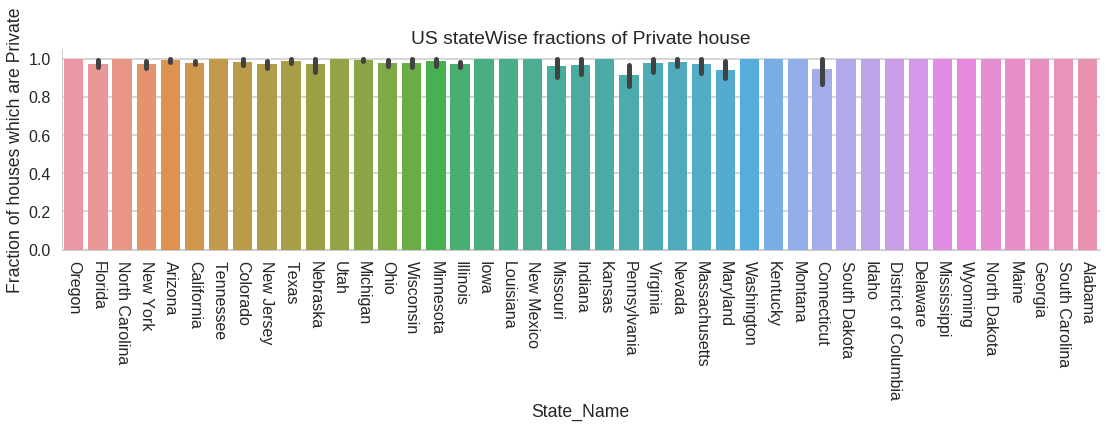

In [50]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import seaborn as sns
import math
from uszipcode import ZipcodeSearchEngine
import us
import json
df=pd.read_csv('/home/aronzx/Desktop/data_PA1.csv')
dic={'Latitude':df['lat'],'Longitude':df['long'],'House_Type':df['house_types']}
tf=pd.DataFrame(dic)
tf=tf.dropna(axis=0, how='any')
tf = tf.reset_index(drop=True)
search = ZipcodeSearchEngine()
StateNames=[]
for lat,lon in zip(tf['Latitude'],tf['Longitude']):
    res = search.by_coordinate(lat, lon, radius=30, returns=1)
    jres=json.loads(str(res))
    if (len(jres)>0):
        stateCode=jres[0]['State']   
        StateNames.append(us.states.lookup(stateCode))
    else:
        StateNames.append('#')
tf['State_Name']=StateNames
tf = tf[tf.State_Name != '#']
mymap = {'private_house':1, 'apartment_blocks':0,'other':0}
tf=tf.applymap(lambda s: mymap.get(s) if s in mymap else s)
tf = tf.reset_index(drop=True)
sns.set_context("poster")
sns.factorplot(x="State_Name", y="House_Type", data=tf, kind="bar",size=4, aspect=4)
plt.xticks(rotation=-90)
plt.xlabel('State_Name')
plt.ylabel('Fraction of houses which are Private')
plt.title('US stateWise fractions of Private house')

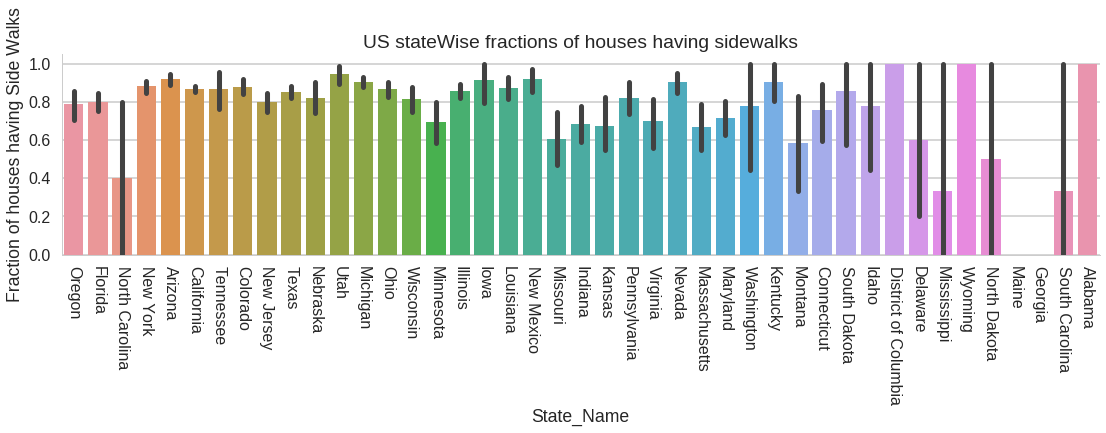

In [51]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import seaborn as sns
import math
from uszipcode import ZipcodeSearchEngine
import us
import json
df=pd.read_csv('/home/aronzx/Desktop/data_PA1.csv')
dic={'Latitude':df['lat'],'Longitude':df['long'],'SideWalk':df['sidewalk_ok']}
tf=pd.DataFrame(dic)
tf=tf.dropna(axis=0, how='any')
tf = tf.reset_index(drop=True)
search = ZipcodeSearchEngine()
StateNames=[]
for lat,lon in zip(tf['Latitude'],tf['Longitude']):
    res = search.by_coordinate(lat, lon, radius=30, returns=1)
    jres=json.loads(str(res))
    if (len(jres)>0):
        stateCode=jres[0]['State']   
        StateNames.append(us.states.lookup(stateCode))
    else:
        StateNames.append('#')
tf['State_Name']=StateNames
tf = tf[tf.State_Name != '#']
mymap = {'yes':1, 'no':0,'Not sure, mixed':0}
tf=tf.applymap(lambda s: mymap.get(s) if s in mymap else s)
tf = tf.reset_index(drop=True)
sns.set_context("poster")
sns.factorplot(x="State_Name", y="SideWalk", data=tf, kind="bar",size=4, aspect=4)
plt.xticks(rotation=-90)
plt.xlabel('State_Name')
plt.ylabel('Fraction of houses having Side Walks')
plt.title('US stateWise fractions of houses having sidewalks')

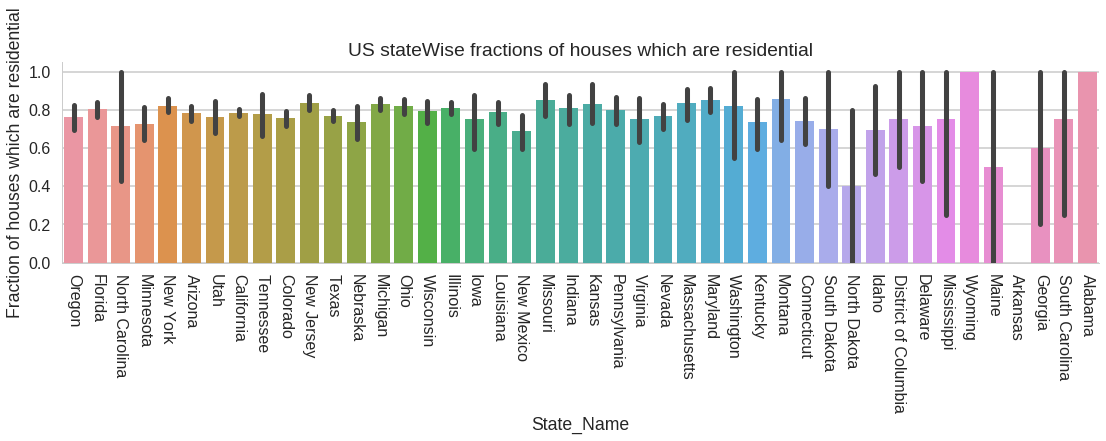

In [52]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import seaborn as sns
import math
from uszipcode import ZipcodeSearchEngine
import us
import json
df=pd.read_csv('/home/aronzx/Desktop/data_PA1.csv')
dic={'Latitude':df['lat'],'Longitude':df['long'],'Residence':df['residential_yes']}
tf=pd.DataFrame(dic)
tf=tf.dropna(axis=0, how='any')
tf = tf.reset_index(drop=True)
search = ZipcodeSearchEngine()
StateNames=[]
for lat,lon in zip(tf['Latitude'],tf['Longitude']):
    res = search.by_coordinate(lat, lon, radius=30, returns=1)
    jres=json.loads(str(res))
    if (len(jres)>0):
        stateCode=jres[0]['State']   
        StateNames.append(us.states.lookup(stateCode))
    else:
        StateNames.append('#')
tf['State_Name']=StateNames
tf = tf[tf.State_Name != '#']
tf = tf[tf.Residence != 'not_avail']
mymap = {'yes':1, 'no':0}
tf=tf.applymap(lambda s: mymap.get(s) if s in mymap else s)
tf = tf.reset_index(drop=True)
sns.set_context("poster")
sns.factorplot(x="State_Name", y="Residence", data=tf, kind="bar",size=4, aspect=4)
plt.xticks(rotation=-90)
plt.xlabel('State_Name')
plt.ylabel('Fraction of houses which are residential')
plt.title('US stateWise fractions of houses which are residential')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import seaborn as sns
import math
from uszipcode import ZipcodeSearchEngine
import us
import json
import gmplot
df=pd.read_csv('/home/aronzx/Desktop/data_PA1.csv')
dic={'Latitude':df['lat'],'Longitude':df['long'],'Residence':df['residential_yes']}
tf=pd.DataFrame(dic)
tf=tf.dropna(axis=0, how='any')
tf = tf.reset_index(drop=True)
search = ZipcodeSearchEngine()
StateNames=[]
for lat,lon in zip(tf['Latitude'],tf['Longitude']):
    res = search.by_coordinate(lat, lon, radius=30, returns=1)
    jres=json.loads(str(res))
    if (len(jres)>0):
        stateCode=jres[0]['State']   
        StateNames.append(us.states.lookup(stateCode))
    else:
        StateNames.append('#')
tf['State_Name']=StateNames
tf = tf[tf.State_Name != '#']
tf = tf[tf.Residence != 'not_avail']
mymap = {'yes':1, 'no':0}
tf=tf.applymap(lambda s: mymap.get(s) if s in mymap else s)
tfr = tf[tf.Residence == 1]
tfnr = tf[tf.Residence == 0]
tf = tf.reset_index(drop=True)
tfr = tfr.reset_index(drop=True)
tfnr = tfnr.reset_index(drop=True)
lats1=tfr['Latitude']
lons1=tfr['Longitude']
lats2=tfnr['Latitude']
lons2=tfnr['Longitude']
gmap = gmplot.GoogleMapPlotter(lats1[0], lons1[0], 16)
gmap.scatter(lats1, lons1, '#00FA9A', marker=True) #Residential = Green
gmap.scatter(lats2, lons2, '#8B0000', marker=True) #Non residential = Red
gmap.draw("fMap.html")

In [6]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import seaborn as sns
import math
df=pd.read_csv('/home/aronzx/Desktop/data_PA1.csv')
dic={'Address':df['aadress']}
test_frame=pd.DataFrame(dic)
test_frame=test_frame.dropna(axis=0, how='any')
test_frame = test_frame.reset_index(drop=True)
for ind in test_frame['Address']:
    print ind


4210 Southwest 167th Avenue, Beaverton, OR 97007, USA 
4761 Southwest Martha Street, Portland, OR 97221, USA 
1545 Southwest Nancy Drive, Gresham, OR 97080, USA 
4990 Southwest 188th Place, Aloha, OR 97007, USA 
2089 Southwest Nancy Drive, Gresham, OR 97080, USA 
189-211 Glynbrook Street North, Keizer, OR 97303, USA 
1665 Silverton Road Northeast, Salem, OR 97301, USA 
2241 Chapman Hill Drive Northwest, Salem, OR 97304, USA 
3065 Briana Court Northwest, Salem, OR 97304, USA 
2100 Turner Road Southeast, Salem, OR 97302, USA 
4780 Croisan Creek Road South, Salem, OR 97302, USA 
405 Northeast Circle Boulevard, Corvallis, OR 97330, USA 
3255 Southwest Willamette Avenue, Corvallis, OR 97333, USA 
2930 Chad Drive, Eugene, OR 97408, USA 
2221 Northeast 3rd Street, Bend, OR 97701, USA 
373 Woodlane Drive, Springfield, OR 97477, USA 
500 Valley River Center, Eugene, OR 97401, USA 
2100 Westwood Lane, Eugene, OR 97401, USA 
106 Cleveland Street, Eugene, OR 97402, USA 
1108 7th Street, Springfiel

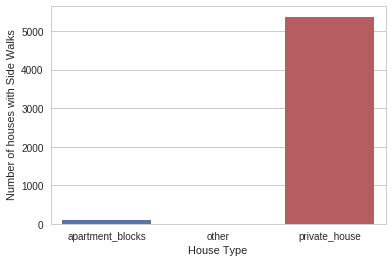

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import seaborn as sns
import math
df=pd.read_csv('/home/aronzx/Desktop/data_PA1.csv')
htype=[];
swalk=[];
htype=df['house_types']
swalk=df['sidewalk_ok']
dic={'House_Type':htype,'Side_Walk':swalk}
test_frame=pd.DataFrame(dic)
mymap = {'yes':1, 'no':0,'Not sure, mixed':0}
test_frame=test_frame.dropna(axis=0, how='any')
test_frame = test_frame.reset_index(drop=True)
test_frame=test_frame.applymap(lambda s: mymap.get(s) if s in mymap else s)
# test_frame.Side_Walk = test_frame.Side_Walk.astype(np.int64)
# print (test_frame[ pd.to_numeric(test_frame['Side_Walk'], errors='coerce').isnull()])
# test_frame['Side_Walk'] = pd.to_numeric(test_frame['Side_Walk'], errors='coerce')
test_frame['Side_Walk'] = test_frame['Side_Walk'].astype(int)
# test_frame=test_frame.dropna(axis=0, how='any')
# test_frame = test_frame.reset_index(drop=True)
# print test_frame
# plt.pie(
#     # using data total)arrests
#     test_frame['Side_Walk'],
#     # with the labels being officer names
#     labels=test_frame['House_Type'],
#     # with no shadows
#     shadow=False,
#     # with colors
#     colors=colors,
#     # with the start angle at 90%
#     startangle=90,
#     # with the percent listed as a fraction
#     autopct='%1.1f%%',
#     )
# plt.axis('equal')

# # View the plot
# plt.tight_layout()
# plt.show()




sums = test_frame.Side_Walk.groupby(test_frame.House_Type).sum()
sns.set_style("whitegrid")
ax = sns.barplot(x=sums.index, y=sums, data=test_frame)
ax.set(xlabel='House Type', ylabel=' Number of houses with Side Walks')
# plt.pie(
#     # using data total)arrests
#     sums,
#     # with the labels being officer names
#     labels=sums.index,
#     # with no shadows
#     shadow=False,
#     # with the start angle at 90%
#     startangle=90,
#     # with the percent listed as a fraction
#     autopct='%1.1f%%',
#     )
# plt.axis('equal')

# # View the plot
# plt.tight_layout()
# plt.show()


# plt.axis('equal');
# plt.pie(sums, labels=sums.index);
# plt.show()

In [32]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import seaborn as sns
import math
tf=pd.read_csv('/home/aronzx/Desktop/data_PA1.csv')
dic={'House_Type':tf['house_types'],'Side_Walk':tf['sidewalk_ok']}
df=pd.DataFrame(dic)
df=test_frame.dropna(axis=0, how='any')
df = test_frame.reset_index(drop=True)




In [2]:
import geograpy
import nltk
# nltk.download()
tt = '2221 Northeast 3rd Street, Bend, OR 97701, USA'
places = geograpy.get_place_context(text=tt)
print places.countries
print places.cities

[u'United States']
[u'Bend']


In [16]:
from uszipcode import ZipcodeSearchEngine
import us
import json
search = ZipcodeSearchEngine()
# zipcode = search.by_zipcode("97701")
# print(zipcode)
res = search.by_coordinate(42.30388, -122.873748, radius=30, returns=1)
jres=json.loads(str(res))
print jres[0]['State']
# zipcode = search.by_zipcode("97501")
# print zipcode.City
# print zipcode.State
# us.states.lookup(zipcode.State)
# print res

OR


In [28]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import seaborn as sns
import math
from uszipcode import ZipcodeSearchEngine
import us
import json
df=pd.read_csv('/home/aronzx/Desktop/data_PA1.csv')
dic={'Latitude':df['lat'],'Longitude':df['long']}
tf=pd.DataFrame(dic)
tf=tf.dropna(axis=0, how='any')
tf = tf.reset_index(drop=True)

search = ZipcodeSearchEngine()
i=1
StateNames=[]
for lat,lon in zip(tf['Latitude'],tf['Longitude']):
    res = search.by_coordinate(lat, lon, radius=30, returns=1)
    jres=json.loads(str(res))
    if (len(jres)>0):
        stateCode=jres[0]['State']   
        StateNames.append(us.states.lookup(stateCode))
len(StateNames)


10034

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text xticklabel objects>)

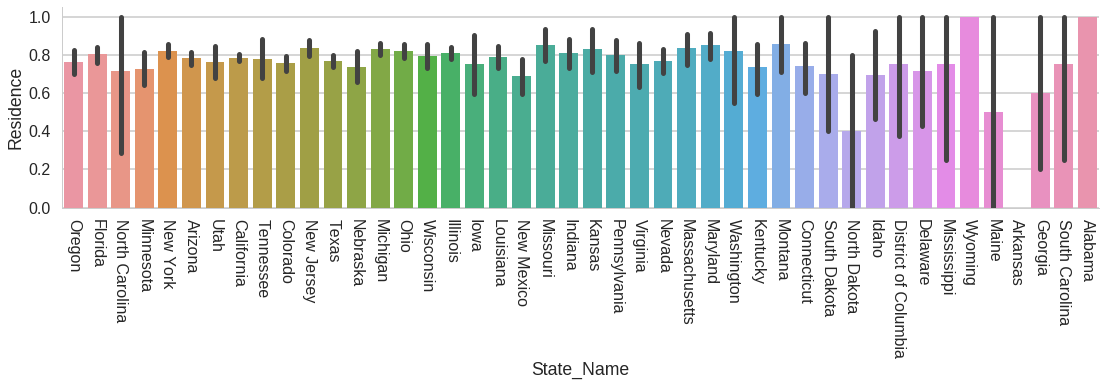

In [60]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import seaborn as sns
import math
from uszipcode import ZipcodeSearchEngine
import us
import json
df=pd.read_csv('/home/aronzx/Desktop/data_PA1.csv')
dic={'Latitude':df['lat'],'Longitude':df['long'],'Residence':df['residential_yes']}
tf=pd.DataFrame(dic)
tf=tf.dropna(axis=0, how='any')
tf = tf.reset_index(drop=True)
search = ZipcodeSearchEngine()
StateNames=[]
for lat,lon in zip(tf['Latitude'],tf['Longitude']):
    res = search.by_coordinate(lat, lon, radius=30, returns=1)
    jres=json.loads(str(res))
    if (len(jres)>0):
        stateCode=jres[0]['State']   
        StateNames.append(us.states.lookup(stateCode))
    else:
        StateNames.append('#')
tf['State_Name']=StateNames
tf = tf[tf.State_Name != '#']
tf = tf[tf.Residence != 'not_avail']
mymap = {'yes':1, 'no':0}
tf=tf.applymap(lambda s: mymap.get(s) if s in mymap else s)
tf = tf.reset_index(drop=True)
sns.set_context("poster")
sns.factorplot(x="State_Name", y="Residence", data=tf, kind="bar",size=4, aspect=4)
plt.xticks(rotation=-90)

In [13]:
import gmplot
gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)
more_lats=[37.450]
more_lngs=[-122.145]
gmap.plot(more_lats, more_lngs, 'cornflowerblue', edge_width=10)
gmap.scatter(more_lats, more_lngs, '#3B0B39', size=40, marker=False)
gmap.scatter(more_lats, more_lngs, 'k', marker=True)
gmap.heatmap(more_lats, more_lngs)
gmap.draw("mymap.html")


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import seaborn as sns
import math
from uszipcode import ZipcodeSearchEngine
import us
import json
import gmplot
df=pd.read_csv('/home/aronzx/Desktop/data_PA1.csv')
dic={'Latitude':df['lat'],'Longitude':df['long'],'Residence':df['residential_yes']}
tf=pd.DataFrame(dic)
tf=tf.dropna(axis=0, how='any')
tf = tf.reset_index(drop=True)
search = ZipcodeSearchEngine()
StateNames=[]
for lat,lon in zip(tf['Latitude'],tf['Longitude']):
    res = search.by_coordinate(lat, lon, radius=30, returns=1)
    jres=json.loads(str(res))
    if (len(jres)>0):
        stateCode=jres[0]['State']   
        StateNames.append(us.states.lookup(stateCode))
    else:
        StateNames.append('#')
tf['State_Name']=StateNamesYourYour
tf = tf[tf.State_Name != '#']
tf = tf[tf.Residence != 'not_avail']
mymap = {'yes':1, 'no':0}
tf=tf.applymap(lambda s: mymap.get(s) if s in mymap else s)
tfr = tf[tf.Residence == 1]
tfnr = tf[tf.Residence == 0]
tf = tf.reset_index(drop=True)
tfr = tfr.reset_index(drop=True)
tfnr = tfnr.reset_index(drop=True)
lats1=tfr['Latitude']
lons1=tfr['Longitude']
lats2=tfnr['Latitude']
lons2=tfnr['Longitude']
gmap = gmplot.GoogleMapPlotter(lats1[0], lons1[0], 16)
gmap.scatter(lats1, lons1, '#00FA9A', marker=True)
gmap.scatter(lats2, lons2, '#8B0000', marker=True)
gmap.draw("fMap.html")



NameError: name 'StateNamesYourYour' is not defined